In [ ]:
# ------------- Setup and Imports -------------
import pandas as pd
import numpy as np
import os
import sys

sys.path.append("../")

from src.functions import *
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

# Seed for reproducibility
np.random.seed(42)


In [2]:
# ------------- Load Datasets -------------
dev_df = load_dataset("../data/development_final_data.csv")
val_df = load_dataset("../data/evaluation_final_data.csv")


# ------------- Split target and features -------------
X_dev, y_dev = split_features_target(dev_df, 'BMI')
X_val, y_val = split_features_target(val_df, 'BMI')


# ------------- Directories for Saving Models -------------
os.makedirs("../models", exist_ok=True)
os.makedirs("../final_models", exist_ok=True)

In [13]:
### ------------- BASELINE MODELS -------------

# Initialize models with default hyperparameters 
models = {'ElasticNet_baseline' : ElasticNet(),
          'SVR_baseline' : SVR(),
          'BayesianRidge_baseline' : BayesianRidge()}

baseline_results = {}
baseline_scores = {}


for name, model in models.items():

    # 1. Using `train_model` function to train the model
    trained_model = train_model(X_dev, y_dev, model)

    # 2. Using `save_model` function to save the model
    save_model(trained_model, f"../models/{name}.joblib")

    # 3. Using `evaluate_model` function to evaluate on full evaluation set
    full_metrics = evaluate_model(trained_model, X_dev, y_dev, X_val, y_val)
    print(f"The metrics on full dataset for the model {name} are\n {pd.DataFrame([full_metrics])}\n")

    # 4. Using `bootstrap_evaluation` function to repeat the evaluation multiple times in the eval set
    bootstrap_summary, bootstrap_scores = bootstrap_evaluation(trained_model, X_val, y_val, n_iterations=100)
    baseline_results[name] = bootstrap_summary
    baseline_scores[name] = bootstrap_scores

# ------------- Baseline Results to DataFrame -------------
baseline_summary = bootstrap_dataframe(baseline_results)
print(baseline_summary)

The metrics on full dataset for the model ElasticNet_baseline are
    train_rmse  train_mae  train_r2  test_rmse  test_mae   test_r2
0         1.0   0.653775       0.0   0.946902  0.680027 -0.001216

The metrics on full dataset for the model SVR_baseline are
    train_rmse  train_mae  train_r2  test_rmse  test_mae   test_r2
0    0.757553   0.306256  0.426114   0.855728  0.554217  0.182309

The metrics on full dataset for the model BayesianRidge_baseline are
    train_rmse  train_mae  train_r2  test_rmse  test_mae   test_r2
0    0.869511   0.521143  0.243951   0.871778  0.599233  0.151348

                        RMSE_mean  RMSE_median  RMSE_ci_low  RMSE_ci_high  \
ElasticNet_baseline      0.938703     0.930246     0.821091      1.070655   
SVR_baseline             0.851810     0.845228     0.736131      0.994263   
BayesianRidge_baseline   0.867513     0.855049     0.762734      1.005117   

                        MAE_mean  MAE_median  MAE_ci_low  MAE_ci_high  \
ElasticNet_baseline   

In [3]:
### ------------- FEATURE SELECTION MODELS -------------

# Initialize models with default hyperparameters 
models = {'ElasticNet_FS' : ElasticNet(),
          'SVR_FS' : SVR(),
          'BayesianRidge_FS' : BayesianRidge()}

FS_resluts = {}
FS_scores = {}
selected_features_dict = {}

# Filter-based Feature Selection Method for all models
X_dev_filt, filtered_features = filter_fs(X_dev, y_dev)
X_val_filt = X_val[filtered_features]

for name, model in models.items():

    # 1. Using `select_features_sfs` function to select features for SVR model
    if name == 'SVR_FS':
        X_dev_fs, selected_features = select_features_sfs(model, X_dev_filt, y_dev)
        X_val_fs = X_val[selected_features]

    else:
        X_dev_fs = X_dev_filt
        X_val_fs = X_val_filt
        selected_features = filtered_features

    selected_features_dict[name] = selected_features


    # 2. Using `train_model` function to train the model
    trained_model = train_model(X_dev_fs, y_dev, model)

    # 3. Using `save_model` function to save the model
    save_model(trained_model, f"../models/{name}.joblib")

    # 4. Using `evaluate_model` function to evaluate on full evaluation set
    full_metrics = evaluate_model(trained_model, X_dev_fs, y_dev, X_val_fs, y_val)
    print(f"The metrics on full dataset for the model {name} are\n {pd.DataFrame([full_metrics])}\n")

    # 5. Using `bootstrap_evaluation` function to repeat the evaluation multiple times in the eval set
    bootstrap_summary, bootstrap_scores = bootstrap_evaluation(trained_model, X_val_fs, y_val, n_iterations=100)
    FS_resluts[name] = bootstrap_summary
    FS_scores[name] = bootstrap_scores

# ------------- FS Results to DataFrame -------------
FS_summary = bootstrap_dataframe(FS_resluts)
print(FS_summary)

The metrics on full dataset for the model ElasticNet_FS are
    train_rmse  train_mae  train_r2  test_rmse  test_mae   test_r2
0         1.0   0.653775       0.0   0.946902  0.680027 -0.001216



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.1s
Features: 1/50[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.6s
Features: 2/50[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.2s
Features: 3/50[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.7s
Features: 4/50[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.8s
Features: 5/50[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.8s
Features: 6/50[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.8s
Features: 7/50[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.4s
Features: 8/50[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s
Features: 9/50[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s
Features: 10/50[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.6s
Features: 11/50[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s
Features: 12/50[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.8s
Features: 13/50[Parallel(n_jobs=1)]:

The metrics on full dataset for the model SVR_FS are
    train_rmse  train_mae  train_r2  test_rmse  test_mae   test_r2
0    0.770973   0.347262  0.405601   0.846818    0.5736  0.199248

The metrics on full dataset for the model BayesianRidge_FS are
    train_rmse  train_mae  train_r2  test_rmse  test_mae   test_r2
0    0.866504   0.520188  0.249171   0.862597  0.593115  0.169129

                  RMSE_mean  RMSE_median  RMSE_ci_low  RMSE_ci_high  MAE_mean  \
ElasticNet_FS      0.938703     0.930246     0.821091      1.070655  0.675721   
SVR_FS             0.842315     0.838894     0.740935      0.959319  0.572743   
BayesianRidge_FS   0.857787     0.844823     0.752453      0.996638  0.593106   

                  MAE_median  MAE_ci_low  MAE_ci_high   R2_mean  R2_median  \
ElasticNet_FS       0.671339    0.602172     0.761015 -0.006313  -0.002661   
SVR_FS              0.569381    0.489369     0.634789  0.188005   0.189259   
BayesianRidge_FS    0.585976    0.524662     0.670988  0.

In [15]:
### ------------- HYPERPARAMETER TUNING MODELS -------------

# Initialize models with default hyperparameters 
models = {'ElasticNet' : ElasticNet(),
          'SVR' : SVR(),
          'BayesianRidge' : BayesianRidge()}

tuning_results = {}
tuning_results_scores = {}

# Define the hyperparameter grid for tuning
param_grids = {
    'ElasticNet' : {
        'alpha' : [0.01, 0.1, 1.0, 10.0],
        'l1_ratio' : [0.1, 0.5, 0.9, 1.0]
    },
    'SVR' : {
        'C' : [0.1, 1.0, 10.0],
        'gamma' : ['scale', 'auto'],
        'epsilon' : [0.01, 0.1, 0.5]
    },
    'BayesianRidge': {
        'alpha_1': [1e-6, 1e-5, 1e-4],
        'alpha_2': [1e-6, 1e-5, 1e-4],
        'lambda_1': [1e-6, 1e-5, 1e-4],
        'lambda_2': [1e-6, 1e-5, 1e-4]
    }
}


# Remove the '_FS' suffix from the selected features
selected_features_dict = {
    name.replace('_FS', ''): feats for name, feats in selected_features_dict.items()
}

for name, model in models.items():

    # 1. Define param_grid for the model
    param_grid = param_grids[name]

    # 2. Using selected_features from the previous step
    selected_feats = selected_features_dict[name]
    X_dev_fs = X_dev[selected_feats]
    X_val_fs = X_val[selected_feats]

    # 3. Tune and train the model using `tune_model` function
    tuned_model = tune_model(model, X_dev_fs, y_dev, param_grid)

    # 4. Using `save_model` function to save the model
    save_model(trained_model, f"../models/{name}_tuned.joblib")

    # 4. Using `evaluate_model` function to evaluate on full evaluation set
    full_metrics = evaluate_model(tuned_model, X_dev_fs, y_dev, X_val_fs, y_val)
    print(f"The metrics on full dataset for the model {name} are\n {pd.DataFrame([full_metrics])}\n")

    # 5. Using `bootstrap_evaluation` function to repeat the evaluation multiple times in the eval set
    bootstrap_summary, bootstrap_scores = bootstrap_evaluation(tuned_model, X_val_fs, y_val, n_iterations=100)
    tuning_results[name] = bootstrap_summary
    tuning_results_scores[name] = bootstrap_scores

# ------------- Hyperparameter Tuning Results to DataFrame -------------
tuning_summary = bootstrap_dataframe(tuning_results)
print(tuning_summary)


 Tuning: ElasticNet
 Grid size: 8 total params
 Dataset shape: 489 samples, 107 features
 Best parameters: {'alpha': 1.0, 'l1_ratio': 0.1}
 Best CV score: 0.9825
The metrics on full dataset for the model ElasticNet are
    train_rmse  train_mae  train_r2  test_rmse  test_mae   test_r2
0    0.964183    0.62428  0.070351   0.925424  0.657534  0.043689


 Tuning: SVR
 Grid size: 8 total params
 Dataset shape: 489 samples, 43 features
 Best parameters: {'C': 1.0, 'epsilon': 0.1, 'gamma': 'scale'}
 Best CV score: 0.8946
The metrics on full dataset for the model SVR are
    train_rmse  train_mae  train_r2  test_rmse  test_mae   test_r2
0    0.770973   0.347262  0.405601   0.846818    0.5736  0.199248


 Tuning: BayesianRidge
 Grid size: 12 total params
 Dataset shape: 489 samples, 107 features
 Best parameters: {'alpha_1': 1e-06, 'alpha_2': 0.0001, 'lambda_1': 0.0001, 'lambda_2': 0.0001}
 Best CV score: 0.9640
The metrics on full dataset for the model BayesianRidge are
    train_rmse  train

In [10]:
### ------------- OPTUNA HYPERPARAMETER TUNING MODELS -------------

# Initialize models with default hyperparameters 
models = {'ElasticNet' : ElasticNet(),
          'SVR' : SVR(),
          'BayesianRidge' : BayesianRidge()}

optuna_results = {}
optuna_results_scores = {}

# Define the Optuna-friendly param spaces
param_spaces = {
    'ElasticNet' : {
        'alpha' : (0.01, 10.0, 'log'),
        'l1_ratio' : (0.1, 1.0)
    },
    'SVR' : {
        'C' : (0.1, 100.0, 'log'),
        'gamma' : ['scale', 'auto'],
        'epsilon' : (0.001, 1.0, 'log')
    },
    'BayesianRidge': {
        'alpha_1': (1e-6, 1e-4, 'log'),
        'alpha_2': (1e-6, 1e-4, 'log'),
        'lambda_1': (1e-6, 1e-4, 'log'),
        'lambda_2': (1e-6, 1e-4, 'log')
    }
}

# Remove the '_FS' suffix from the selected features
selected_features_dict = {
    name.replace('_FS', ''): feats for name, feats in selected_features_dict.items()
}

for name, model in models.items():

    # 1. Define param_space for the model
    param_space = param_spaces[name]

    # 2. Using selected_features from the previous step
    selected_feats = selected_features_dict[name]
    X_dev_fs = X_dev[selected_feats]
    X_val_fs = X_val[selected_feats]

    # 3. Tune and train the model using `tune_model_optuna` function
    tuned_model, best_params, best_score = tune_model_optuna(model, X_dev_fs, y_dev, param_space)

    # 4. Save the tuned model
    save_model(tuned_model, f"../models/{name}_optuna.joblib")

    # 5. Evaluate on full evaluation set
    full_metrics = evaluate_model(tuned_model, X_dev_fs, y_dev, X_val_fs, y_val)
    print(f"The metrics on full dataset for the model {name} are\n {pd.DataFrame([full_metrics])}\n")

    # 6. Repeat bootstrap evaluation
    bootstrap_summary, bootstrap_scores = bootstrap_evaluation(tuned_model, X_val_fs, y_val, n_iterations=100)
    optuna_results[name] = bootstrap_summary
    optuna_results_scores[name] = bootstrap_scores

# ------------- Optuna Results to DataFrame -------------
optuna_summary = bootstrap_dataframe(optuna_results)
print(optuna_summary)


[I 2025-04-07 02:36:56,391] A new study created in memory with name: no-name-e8be7ed5-32a6-44cc-a31e-6d1e6e356365
[I 2025-04-07 02:36:56,464] Trial 0 finished with value: 0.991535080763262 and parameters: {'alpha': 3.2497711545884, 'l1_ratio': 0.5026582250279544}. Best is trial 0 with value: 0.991535080763262.
[I 2025-04-07 02:36:56,521] Trial 1 finished with value: 0.991535080763262 and parameters: {'alpha': 2.9999152755152774, 'l1_ratio': 0.8999859518283025}. Best is trial 0 with value: 0.991535080763262.
[I 2025-04-07 02:36:56,573] Trial 2 finished with value: 0.9918342106376983 and parameters: {'alpha': 0.35005320308949217, 'l1_ratio': 0.8055348175347218}. Best is trial 0 with value: 0.991535080763262.
[I 2025-04-07 02:36:56,622] Trial 3 finished with value: 0.986492330043923 and parameters: {'alpha': 0.09597642200486899, 'l1_ratio': 0.5657523201282729}. Best is trial 3 with value: 0.986492330043923.
[I 2025-04-07 02:36:56,671] Trial 4 finished with value: 1.0082448888131226 and pa

The metrics on full dataset for the model ElasticNet are
    train_rmse  train_mae  train_r2  test_rmse  test_mae   test_r2
0    0.888824    0.55411  0.209992   0.880106  0.607082  0.135057



[I 2025-04-07 02:36:59,556] A new study created in memory with name: no-name-fb404a9d-386c-41a0-a302-fbc47aa905e4
[I 2025-04-07 02:36:59,643] Trial 0 finished with value: 0.9779703279803412 and parameters: {'C': 36.8751451231623, 'gamma': 'auto', 'epsilon': 0.5796419924231039}. Best is trial 0 with value: 0.9779703279803412.
[I 2025-04-07 02:36:59,778] Trial 1 finished with value: 0.9341312965591282 and parameters: {'C': 29.885408592097736, 'gamma': 'scale', 'epsilon': 0.11788475469630359}. Best is trial 1 with value: 0.9341312965591282.
[I 2025-04-07 02:36:59,881] Trial 2 finished with value: 0.9037843017683673 and parameters: {'C': 8.024490915768725, 'gamma': 'scale', 'epsilon': 0.1749054964779371}. Best is trial 2 with value: 0.9037843017683673.
[I 2025-04-07 02:37:00,001] Trial 3 finished with value: 0.9422996751761685 and parameters: {'C': 37.714380379860366, 'gamma': 'auto', 'epsilon': 0.20850334986471925}. Best is trial 2 with value: 0.9037843017683673.
[I 2025-04-07 02:37:00,11

The metrics on full dataset for the model SVR are
    train_rmse  train_mae  train_r2  test_rmse  test_mae   test_r2
0    0.743647   0.289539   0.44699   0.845207  0.570326  0.202293



[I 2025-04-07 02:37:07,414] A new study created in memory with name: no-name-f334476e-6cd5-4f4a-8683-ae8147d1ed89
[I 2025-04-07 02:37:07,510] Trial 0 finished with value: 0.964045531426609 and parameters: {'alpha_1': 8.61342956024585e-06, 'alpha_2': 2.970946921332893e-05, 'lambda_1': 3.096706517521173e-05, 'lambda_2': 6.90839671636921e-05}. Best is trial 0 with value: 0.964045531426609.
[I 2025-04-07 02:37:07,601] Trial 1 finished with value: 0.9640511703626137 and parameters: {'alpha_1': 8.672592147676373e-06, 'alpha_2': 5.1226493191208556e-05, 'lambda_1': 6.940349133316983e-05, 'lambda_2': 9.069366826101955e-06}. Best is trial 0 with value: 0.964045531426609.
[I 2025-04-07 02:37:07,707] Trial 2 finished with value: 0.9640509217787434 and parameters: {'alpha_1': 1.732664780479376e-05, 'alpha_2': 3.4636714469777872e-06, 'lambda_1': 1.8534324976209894e-06, 'lambda_2': 1.2198928936239712e-05}. Best is trial 0 with value: 0.964045531426609.
[I 2025-04-07 02:37:07,812] Trial 3 finished wit

The metrics on full dataset for the model BayesianRidge are
    train_rmse  train_mae  train_r2  test_rmse  test_mae   test_r2
0    0.866217    0.51996  0.249669   0.862576  0.593113  0.169169

               RMSE_mean  RMSE_median  RMSE_ci_low  RMSE_ci_high  MAE_mean  \
ElasticNet      0.875233     0.864056     0.769126      1.001800  0.606132   
SVR             0.841146     0.839012     0.741857      0.953209  0.569821   
BayesianRidge   0.857775     0.844791     0.752388      0.996701  0.593115   

               MAE_median  MAE_ci_low  MAE_ci_high   R2_mean  R2_median  \
ElasticNet       0.603316    0.542787     0.679725  0.124858   0.121785   
SVR              0.568414    0.483230     0.634460  0.189583   0.196697   
BayesianRidge    0.585994    0.524591     0.671025  0.159403   0.157998   

               R2_ci_low  R2_ci_high  
ElasticNet      0.050453    0.207792  
SVR             0.050158    0.294025  
BayesianRidge   0.070167    0.258605  


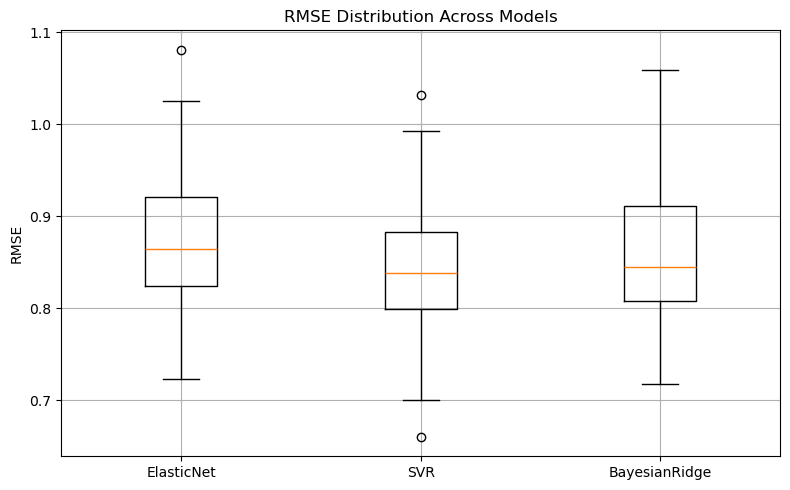

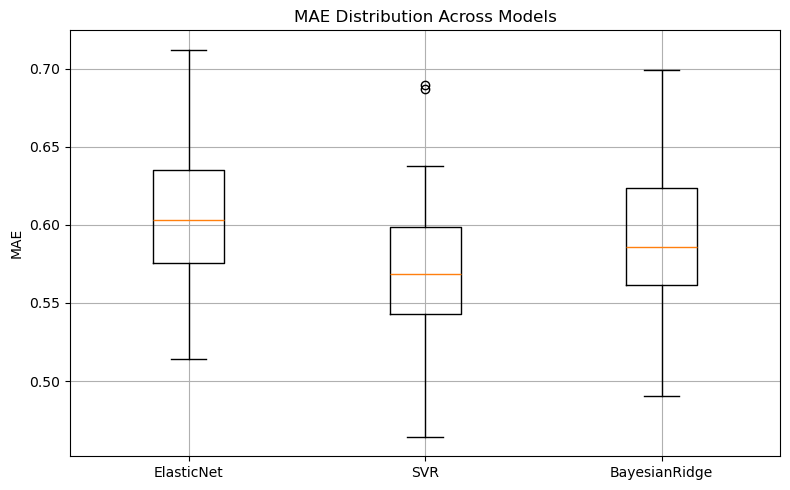

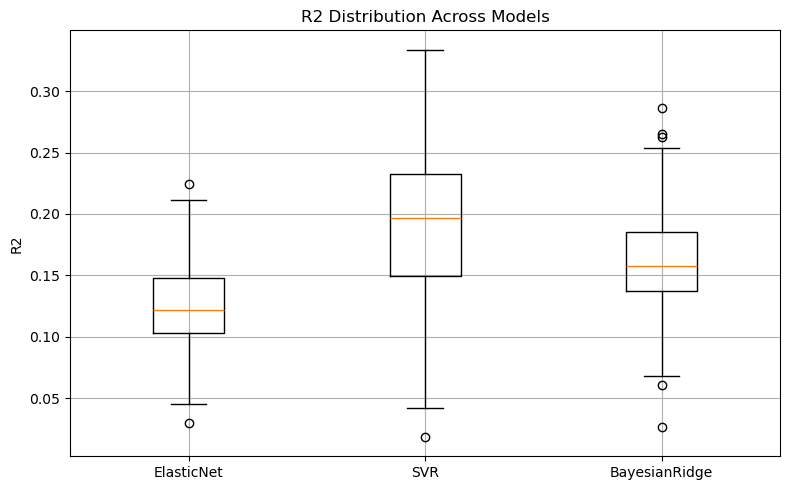

In [11]:
plot_metrics_boxplot(optuna_results_scores)

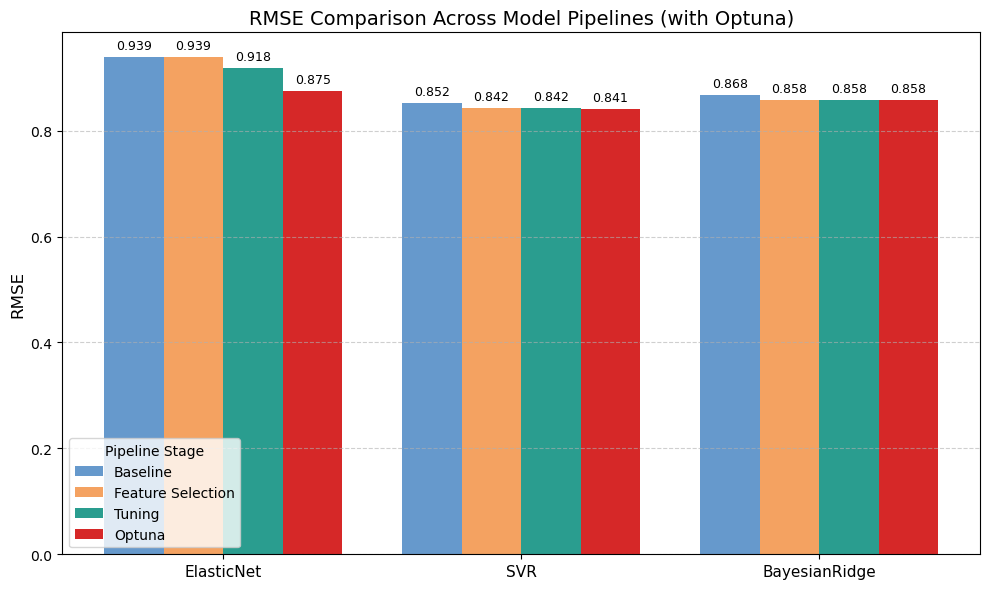

In [ ]:
# ------------- Plotting Metrics of Models with Optuna -------------

# Put all score dictionaries in one place
all_scores = {
    'ElasticNet': {
        'Baseline': baseline_scores['ElasticNet_baseline']['RMSE'],
        'Feature Selection': FS_scores['ElasticNet_FS']['RMSE'],
        'Tuning': tuning_results_scores['ElasticNet']['RMSE'],
        'Optuna': optuna_results_scores['ElasticNet']['RMSE']
    },
    'SVR': {
        'Baseline': baseline_scores['SVR_baseline']['RMSE'],
        'Feature Selection': FS_scores['SVR_FS']['RMSE'],
        'Tuning': tuning_results_scores['SVR']['RMSE'],
        'Optuna': optuna_results_scores['SVR']['RMSE']
    },
    'BayesianRidge': {
        'Baseline': baseline_scores['BayesianRidge_baseline']['RMSE'],
        'Feature Selection': FS_scores['BayesianRidge_FS']['RMSE'],
        'Tuning': tuning_results_scores['BayesianRidge']['RMSE'],
        'Optuna': optuna_results_scores['BayesianRidge']['RMSE']
    }
}

# Colors for each pipeline stage
colors = {
    'Baseline': '#6699cc',
    'Feature Selection': '#f4a261',
    'Tuning': '#2a9d8f',
    'Optuna': '#d62828'
}

# Prepare data for plotting
regressors = list(all_scores.keys())
stages = list(colors.keys())

# Bar width and positions
bar_width = 0.2
x = np.arange(len(regressors))  # base positions for each regressor

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each stage side-by-side
for i, stage in enumerate(stages):
    means = [np.mean(all_scores[reg][stage]) for reg in regressors]
    bar_pos = x + (i - 1.5) * bar_width  # Adjust for 4 bars
    bars = ax.bar(bar_pos, means, width=bar_width, label=stage, color=colors[stage])
    
    # Add values on top of bars
    for rect in bars:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.0, height + 0.01, f"{height:.3f}",
                ha='center', va='bottom', fontsize=9)


ax.set_ylabel('RMSE', fontsize=12)
ax.set_title('RMSE Comparison Across Model Pipelines (with Optuna)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(regressors, fontsize=11)
ax.legend(title='Pipeline Stage')
ax.grid(True, linestyle='--', alpha=0.6, axis='y')
plt.tight_layout()
plt.show()
